In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)


In [3]:
X = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

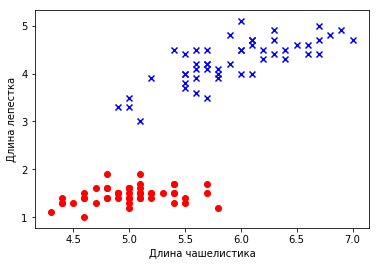

In [4]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='щетинистый')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='разноцветный')
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
plt.show()

In [6]:
from adalinegd import *

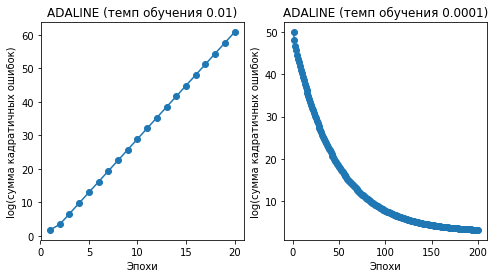

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGd(n_iter=20, eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(сумма кадратичных ошибок)')
ax[0].set_title('ADALINE (темп обучения 0.01)')
ada2 = AdalineGd(n_iter=200, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('log(сумма кадратичных ошибок)')
ax[1].set_title('ADALINE (темп обучения 0.0001)')
plt.show()

Слева: промах по промаху -> ошибка увеличивается
Справа: темп настолько маленький, что для сходимости требуется огромное количество эпох

Алгоритм считает что признаки равнозначны в то время как на самом деле разные признаки принимают разные по величине значения, а значит для получения оптимальных результатов следует стандартизировать признаки.

In [20]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

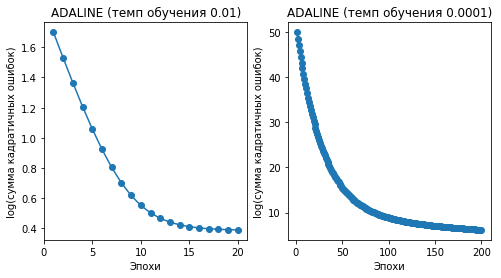

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGd(n_iter=20, eta=0.01).fit(X_std,y)
ax[0].plot(range(1,len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(сумма кадратичных ошибок)')
ax[0].set_title('ADALINE (темп обучения 0.01)')
ada2 = AdalineGd(n_iter=200, eta=0.0001).fit(X_std, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('log(сумма кадратичных ошибок)')
ax[1].set_title('ADALINE (темп обучения 0.0001)')
plt.show()

In [27]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

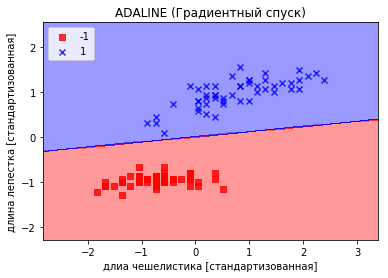

In [29]:
ada = AdalineGd(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('ADALINE (Градиентный спуск)')
plt.xlabel('длиа чешелистика [стандартизованная]')
plt.ylabel('длина лепестка [стандартизованная]')
plt.legend(loc='upper left')
plt.show()
